In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../datas/titanic_train.csv')

In [3]:
# temos alguns missings values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# mostra true para todos nulos
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


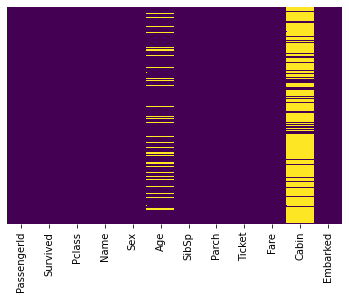

In [5]:
# mostra amarelo para todos true(nulo da tabela acima) nesse caso seria bom apagar a coluna cabin
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

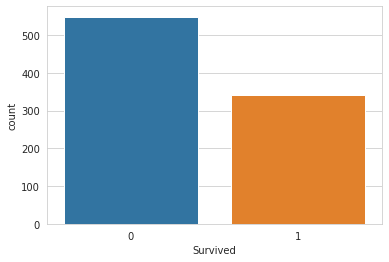

In [7]:
sns.countplot(x='Survived', data=train)

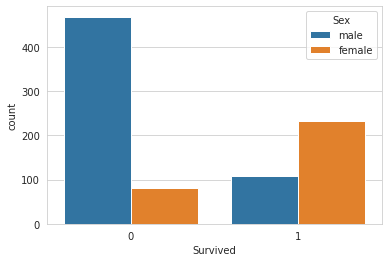

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)

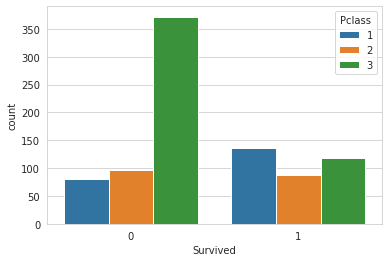

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

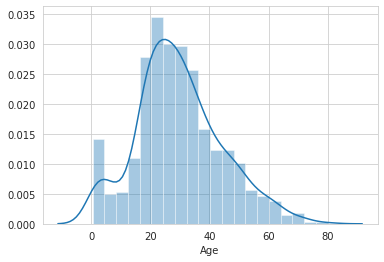

In [10]:
# dropna() nao calcula os valores nulos
sns.distplot(train['Age'].dropna(),bins=20)

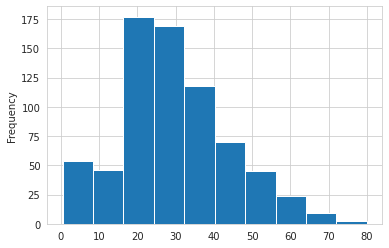

In [11]:
train['Age'].plot.hist()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


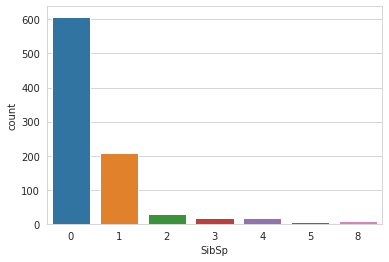

In [13]:
# quantidade de parentes ou filhos a bordo, 0 nenhum , 1 ,2,3,4..
sns.countplot(x='SibSp', data=train)

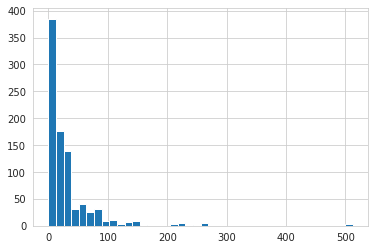

In [14]:
train['Fare'].hist(bins=40)

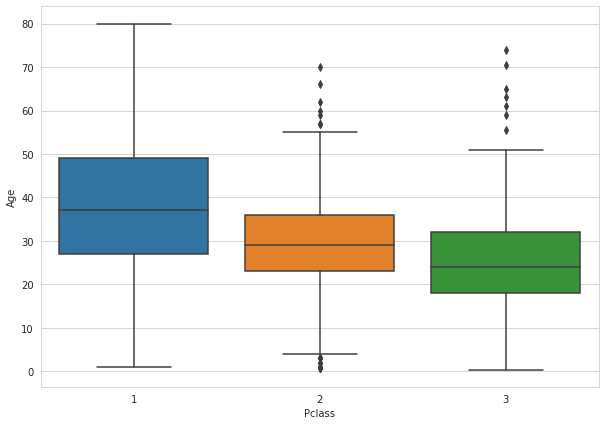

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
# função para preencher as idades dos passageiros que estão nulas de acordo com a média de idade de sua classe
# dessa forma a função percorrerá pela primeira linha da coluna age e pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
# preenche a coluna age com > seleciona as colunas que a função irá ser aplicada
# axis=1 a função será aplicada pela coluna
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1) 

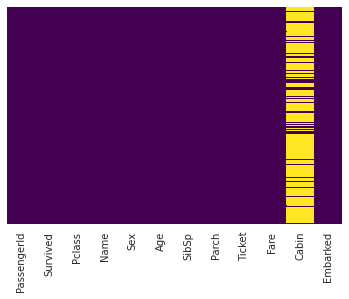

In [18]:
# agora só temos missing values em cabin, age foi preenchida
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
# retirada da coluna cabin
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
# para apagar qualquer outro missing value da tabela
train.dropna(inplace=True)

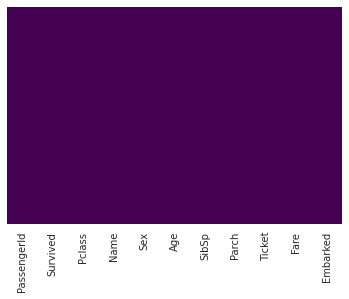

In [21]:
# nao mais missing values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
# converte categorical variables in dummy/indicator variables
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [23]:
# para mandar a tablea para machine learning precisamos apenas de uma coluna
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [25]:
# neste caso não há predições perfeitas, pois pode acontecer de nao ser nem um nem outro, por isso mostra as duas colunas e esconde apenas a c colum, pois se nao for nenhuma das duas é C
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
# axis = 1 adiciona em colunas
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
# apagar as colunas que não serão usadas, pois demonstram valores em str que não são viáveis de se converter em 1 ou 0
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
# mostraque a coluna passengerId é apenas um index com um núemro a mais que op index real então pode apagá-lo
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [30]:
train.drop('PassengerId', axis=1, inplace=True)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
#### aplyyng machine laerning







In [35]:
X = train.drop('Survived', axis=1)
y = train['Survived'] 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()

In [42]:
#training
logmodel.fit(X_train, y_train)

/home/lucas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# calcula a predição do X-test que é o x real
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
# compara as classificações do valor real com o valor de predição
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])

In [49]:
logmodel.coef_

array([[-1.20539108e+00, -4.56890574e-02, -2.55799124e-01,
        -2.17119204e-02,  1.34710470e-03, -2.45175634e+00,
         1.15862406e-01, -1.70722615e-01]])

In [50]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [52]:
# a classe e o sexo são os principais fatores que influenciam a qtt de morte
# o preço da passagem e o local de embarque Q foram os fatores que mais influenciaram para  a sorbevivencia dos passageiros
# dados positivos influenciam positivamente sobre a não morte dos passageiros
# dados negativos influenciam a morte dos passageiros
cdf = pd.DataFrame(logmodel.coef_.T,X.columns.T, columns=['Coeff'])
cdf

,Coeff
Pclass,-1.205391
Age,-0.045689
SibSp,-0.255799
Parch,-0.021712
Fare,0.001347
male,-2.451756
Q,0.115862
S,-0.170723
